# CREDIT CARD FRAUD DETECTION USING ML

## INTRODUCTION

1. We are going to build a Machine Learning model for detecting fraudulent credit card transactions. 
2. The objective of this exercise is to train a few supervised ML algorithms and evaluate the models for their predictive power
3. We will use the dataset freely available in Kaggle "https://www.kaggle.com/mlg-ulb/creditcardfraud/data"
4. The dataset contains 284,807 credit card transactions made on 2 consecutive days during September 2013 by cardholders in Europe 

### STEP 1:  IMPORT THE REQUIRED LIBRARIES 

In [12]:
# Import basic libraries 

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from imblearn.over_sampling import ADASYN,SMOTE 
from collections import Counter
import seaborn as sn
from pandas_profiling import ProfileReport 


# scikit packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report 

# settings
%matplotlib inline
sn.set_style("dark")
sn.set_palette("colorblind")

### STEP 2 : LOAD THE DATA SET

I have stored the data set locally in my machine. We can load the data set directly from 'Kaggle' as well. 

In [13]:
creditcard=pd.read_csv('D:\\16. DATA SCIENCE\\Credit-Card-Fraud-Detection-using-Autoencoders-in-Keras-a3849f2b4413ebe376ac344cfebd8aa8b6a7445c\\data\\creditcard.csv')

### STEP 3 : PERFORM EXPLORATORY DATA ANALYSIS (EDA)

EDA involves the exploring the data for missing values, data quality , type of features (categorical vs numerical), distribution of feature values among others  

In [16]:
# Lets look at the number of rows and columns

creditcard.shape

(284807, 31)

In [5]:
# Lets explore the credit card data set a bit further 
# The data in the data set is anonymized and optimized for training ML models using Princiapl Component Analysis

creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Lets look at the first 5 records in the data frame

creditcard.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [8]:
# Now lets look at the last 5 records in the data frame

creditcard.tail(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.0,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.0,0


In [9]:
# Lets check the number of fraudulent transactions and legit transactions

fraud=creditcard['Class'].value_counts().values[1]
legit=creditcard['Class'].value_counts().values[0]
print('Number of Fraudulent Transactions',fraud)
print('Number of Legitimate Transactions',legit)

Number of Fraudulent Transactions 492
Number of Legitimate Transactions 284315


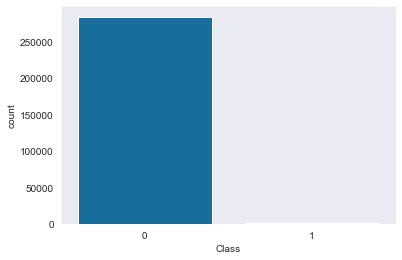

In [10]:
sns.countplot(creditcard['Class'])

### STEP 4 : SEPARATE FEATURES FROM LABEL DATA

In [11]:
# In this step, we are creating a dataframe 'X' with all predictor attributes (aka FEATURES) and a series 'y' , the label 
X = creditcard.iloc[ :,:-1]
y = creditcard["Class"]

In [12]:
type(X)

pandas.core.frame.DataFrame

In [13]:
type(y)

pandas.core.series.Series

### STEP 5 : STANDARDIZE THE VALUES OF FEATURES

In [16]:
# In order for the ML algorithms to run efficiently, we need to standardise the data set. There are a number standardization
# rountines. Converting the feature values to a standard normal distribution (mean =0 and SD =1) is a popular choice
# Here we are calling StandardScaler function and then invoking the fit_transform operation within it

ScaledX =StandardScaler().fit_transform(X)

In [15]:
ScaledX.shape

(284807, 30)

### STEP 6 : PARTITION THE DATA SET INTO TRAINING AND TESTING DATA

In [18]:
# In this step, we will create two data sets, one for training the model and then another one for testing the hypothesis

X_train,X_test,y_train,y_test =train_test_split(ScaledX,y,test_size=0.2,random_state=42)

In [19]:
X_train.shape,y_train.shape

((227845, 30), (227845,))

### STEP 7 : SAMPLING DATA SET

In [20]:
# The credit card data set is highly imbalanced, there are 492 fraudulent transactions whcich is 0.17 %. This means there 
# 17 fraudulent transactions in 10,000 transactions, which is highly imbalanced. In order to train the model , we need to 
# create a balanced data set. We do that using Synthetic Minority Oversampling Technique , aka SMOTE


X_train_rs,y_train_rs=SMOTE().fit_resample(X_train,y_train)

In [17]:
X_train_rs.shape,y_train_rs.shape

((454902, 30), (454902,))

In [39]:
y_train_rs.value_counts().values[1]

227451

In [40]:
y_train_rs.value_counts().values[0]

227451

### STEP 8.1 : TRAIN THE MODEL USING LOGISTIC REGRESSION

In [21]:
# We have prepared the data and now ready to train the model,let's use Logistic Regression as the leraning algorithm
lgr = LogisticRegression()
lgr.fit(X_train_rs, y_train_rs)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### STEP 9.1 : EVALUATE THE MODEL PERFORMANCE 

In [22]:
# Having trained the model in the previous step, now let's review how the model is performing
pred_lgr=lgr.predict(X_test)

print(classification_report(y_test,pred_lgr))
print(confusion_matrix(pred_lgr,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

[[55424     8]
 [ 1440    90]]


### STEP 8.2 : TRAIN THE MODEL USING RANDOM FOREST

In [20]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_rs,y_train_rs)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### STEP 9.2 : EVALUATE THE MODEL PERFORMANCE

In [21]:
pred_rfc=rfc.predict(X_test)

print(classification_report(y_test,pred_rfc))
print(confusion_matrix(pred_rfc,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.84      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962

[[56856    16]
 [    8    82]]


### STEP 10: TRAIN AND EVALUATE SUPPORT VECTOR MACHINES

In [22]:
clf=svm.SVC()
clf.fit(X_train_rs,y_train_rs)
pred_clf=clf.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(pred_rfc,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.84      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962

[[56856    16]
 [    8    82]]
